In [1]:
import numpy as np
import pandas as pd
import os
from matplotlib import pyplot as plt

from matplotlib_venn import venn2, venn2_circles
from matplotlib_venn import venn3

# graficos embebidos
%matplotlib inline

In [3]:
try:
    # Change the current working Directory to the quantification dir
    os.chdir("/home/cyntsc/Proyectos/tesis-code/meta-xtrome-analysis/results-data/")
    print("Directory changed")
except OSError:
    print("Can't change the Current Working Directory")
s_path=os.getcwd()
print(s_path)

Directory changed
/home/cyntsc/Proyectos/tesis-code/meta-xtrome-analysis/results-data


#### require mathplot_venn library
pip3 install matplotlib_venn <br>
matplotlib-venn-0.11.5
<br>
**Los conjuntos eliminan los elementos duplicados**

### Subset 1: Control
**Crea la lista de genes en ceros del conjunto de datos de control "Dataset1"**

In [5]:
file="all_healthy_geneIDs_with_zeros.csv"   #all_infected_geneIDs_with_zeros.csv
df= pd.read_csv(file, sep='\t', header=None)

In [6]:
print(df.shape)
print(df.columns)
set1_ctrl=df[0].drop_duplicates().to_list()
len(set1_ctrl)

(5228, 1)
Int64Index([0], dtype='int64')


5228

### Subset 2: Tratamientos
**Crea la lista de genes en ceros del conjunto de datos de tratamientos "Dataset2"**

In [7]:
file="all_infected_geneIDs_with_zeros.csv"
df= pd.read_csv(file, sep='\t', header=None)

In [8]:
print(df.shape)
print(df.columns)
set2_infect=df[0].drop_duplicates().to_list()
len(set2_infect)

(3415, 1)
Int64Index([0], dtype='int64')


3415

### Universal Set: based on CDS of the Araport11 annotation
**Ahora. Crea el conjunto universal. <br>
Lista de genes codificantes a proteinas en la anotación Araport11.**

In [9]:
file='../meta-data/ID_samples.csv'
df= pd.read_csv(file, sep='\t', header=None)
print(df.shape)
print(df.columns)
set_universal=df[0].drop_duplicates().to_list()
len(set_universal)

(26, 1)
Int64Index([0], dtype='int64')


26

### Compración de los genes apagados en los dos subconjuntos principales

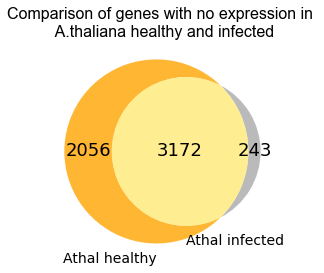

In [10]:
axis_font = {'fontname':'Arial', 'size':'16'}

diagram=venn2([set(set1_ctrl), set(set2_infect)], 
              set_labels = ('Athal healthy', 'Athal infected'),
              set_colors=('orange', 'darkgrey'), alpha = 0.8)

plt.title("Comparison of genes with no expression in \n A.thaliana healthy and infected", **axis_font)

for t in diagram.set_labels: t.set_fontsize(14)
for t in diagram.subset_labels: t.set_fontsize(18)

plt.show()

## Hasta aqui para la tesis

### Compración de los genes apagados en los dos subconjuntos principales con respecto al conjunto universal

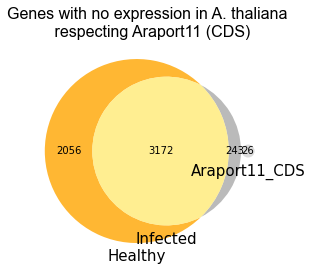

In [21]:
axis_font = {'fontname':'Arial', 'size':'16'}

diagram=venn3([set(set1_ctrl), set(set2_infect), set(set_universal)], 
             set_labels = ('Healthy', 'Infected', 'Araport11_CDS'),
             set_colors=('orange', 'darkgrey','lightgray'), alpha = 0.8)

for t in diagram.set_labels: t.set_fontsize(15)
#for t in diagram.subset_labels: t.set_fontsize(16)

plt.title("Genes with no expression in A. thaliana \n respecting Araport11 (CDS)", **axis_font)
plt.show()

El argumento indica el tamaño relativo de los tres subconjuntos en este orden: Ab (izquierda), aB (derecha), AB (intersección). Así, la tupla (1, 2, 1) dibujaría el conjunto B del doble de tamaño respecto de A.<br>
Para identificar a cada uno de los subconjuntos (tres en diagramas de dos conjuntos) el módulo utiliza una nomenclatura que consiste en colocar un 1 para indicar que la sección está incluida en el conjunto y un 0 para indicar que está excluida. De esta manera. Siguiendo el orden «ABC», el subconjunto 10 es el de la izquierda (el que pertenece a A pero no a B); el 01, el de la derecha (el que pertenece a B pero no a A); y el 11, el del medio (la intersección).

### Operaciones lógicas 

In [11]:
# Cardinalidad de un conjunto con len().
### print("La cardinalidad del conjunto A.thaliana sana = {0} es {1}".format(set1_ctrl,len(set1_ctrl)))  
print("La cardinalidad del conjunto A.thaliana sana es {0}".format(len(set1_ctrl)))  
print("La cardinalidad del conjunto A.thaliana infectada es {0}".format(len(set2_infect)))  

La cardinalidad del conjunto A.thaliana sana es 5228
La cardinalidad del conjunto A.thaliana infectada es 3415


In [12]:
# To logical operations data need to be as set dtype
set1_ctrl = set(set1_ctrl)
# set1_ctrl
set2_infect = set(set2_infect)

In [13]:
# Igualdad
set1_ctrl == set2_infect

False

In [14]:
# Subconjunto
# ¿estan los genes del conjunto de infectadas en el conjunto de control?
set2_infect.issubset(set1_ctrl)

False

In [15]:
## Subconjunto propio
# set2_infect != set1_ctrl
set2_infect.issubset(set1_ctrl) and set2_infect != set1_ctrl
#               FALSE AND TRUE

False

In [16]:
union=set2_infect.union(set1_ctrl)
len(union)

5471

In [20]:
# Intersección de conjuntos
intersec=set2_infect.intersection(set1_ctrl)
lst_intersec=list(intersec)
print(lst_intersec)
len(lst_intersec)

['AT1G60090', 'AT1G59833', 'AT2G02695', 'AT1G55546', 'AT4G09870', 'AT1G30925', 'AT2G03030', 'AT1G68825', 'AT5G33406', 'AT4G07666', 'AT4G07675', 'AT5G41490', 'AT4G03625', 'AT3G25200', 'AT5G38490', 'AT3G48220', 'AT1G30974', 'AT1G30930', 'AT3G58585', 'AT1G74385', 'AT2G36700', 'AT3G61175', 'AT2G12900', 'AT5G55770', 'AT1G66852', 'AT3G43833', 'AT3G20950', 'AT2G25905', 'AT5G50660', 'AT1G25112', 'AT4G20630', 'AT5G24940', 'AT4G08620', 'AT2G01790', 'AT3G44665', 'AT2G07627', 'AT2G37730', 'AT3G16550', 'AT1G53880', 'AT1G47600', 'AT1G65170', 'AT1G45015', 'AT4G10670', 'AT2G15420', 'AT3G24290', 'AT1G55030', 'AT4G10350', 'AT4G23380', 'AT4G37409', 'AT5G50270', 'AT2G10615', 'AT3G43420', 'AT3G61962', 'AT1G26921', 'AT1G58245', 'AT1G58725', 'AT1G59835', 'AT1G62210', 'AT4G31196', 'AT2G36560', 'AT5G38435', 'AT2G31770', 'AT4G30074', 'AT2G19060', 'AT2G02140', 'AT1G43610', 'AT3G46735', 'AT1G11470', 'AT1G46912', 'AT5G31412', 'AT1G50340', 'AT3G43837', 'AT1G54550', 'AT3G52980', 'AT5G23903', 'AT2G03931', 'AT4G11373'

3172

In [18]:
# Diferencia entre conjuntos
dif_ctrl=set1_ctrl - set2_infect
len(dif_ctrl)


2056

In [19]:
dif_inf= set2_infect-set1_ctrl
lst_only_infect=list(dif_inf)
print(lst_only_infect)
len(dif_inf)

['AT1G59725', 'AT1G11655', 'AT5G14340', 'AT5G67120', 'AT1G72980', 'AT4G27110', 'AT2G21980', 'AT3G02493', 'AT2G36985', 'AT2G30940', 'AT3G49230', 'AT1G44478', 'AT5G35380', 'AT5G38400', 'AT5G32460', 'AT2G01800', 'AT2G03823', 'AT1G52940', 'AT5G05150', 'AT1G69860', 'AT4G04580', 'AT1G55650', 'AT5G52655', 'AT4G16024', 'AT2G11522', 'ATCG00860', 'AT1G77790', 'AT4G32090', 'AT3G32047', 'AT1G57780', 'AT2G22145', 'AT4G00080', 'AT1G74675', 'AT3G47170', 'AT3G16680', 'AT1G78360', 'AT2G23118', 'AT1G60987', 'AT5G59270', 'AT5G53380', 'AT5G39930', 'AT1G31555', 'AT1G71290', 'AT2G14265', 'AT1G54760', 'AT1G08120', 'AT3G19613', 'AT2G07640', 'AT3G47440', 'AT2G14830', 'AT2G31550', 'AT3G43583', 'AT3G48346', 'AT1G79130', 'AT2G22440', 'AT1G31400', 'AT1G58265', 'AT4G03157', 'AT1G10455', 'AT5G40360', 'AT1G33900', 'AT2G04037', 'AT3G62440', 'AT1G13605', 'AT5G27800', 'AT5G06010', 'AT4G12360', 'AT1G02490', 'AT2G43261', 'AT5G01017', 'AT2G11851', 'AT1G13825', 'AT1G60340', 'AT4G23070', 'AT4G00342', 'AT2G46850', 'AT5G51090'

243

In [23]:
## Save the gene IDs with ceros in a file 
with open("infected_exclusive_geneIDs_in_zero.csv", "w") as outfile:
    outfile.write("\n".join(str(item) for item in lst_only_infect))

### Extraer los genes apagados del set principal

In [24]:
file="all_d1d2_counter_cero.csv"
df= pd.read_csv(file, sep='\t', header=0)
## remove unnamed cols
df.drop(df.columns[df.columns.str.contains('Unnamed',case=False)],axis=1,inplace=True)
df.drop(["zero-counter"], axis = 1, inplace = True) 
print(df.shape)
print(df.columns)
print(df.head(5))
## lst_only_infect tiene los IDs de los genes a extraer de la matriz principal

FileNotFoundError: [Errno 2] File all_d1d2_counter_cero.csv does not exist: 'all_d1d2_counter_cero.csv'

In [1]:
out = df.set_index('key').loc['Genes'].sum()

NameError: name 'df' is not defined

In [35]:
gen='AT1G49770'
gen_values = df.loc[df['Genes'] == gen]
gen_values

,Genes,SRR3383640,SRR3383821,SRR3383782,SRR6283145,SRR3383641,SRR3383783,SRR3383822,SRR6283144,SRR364399,...,SRR6283147,SRR3383696,SRR3383780,SRR10586397pe,SRR10586399pe,SRR3383779,SRR3383697,SRR364390,SRR364389,SRR364398
4040,AT1G49770,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [90]:

mycolumns = ['Genes','SRR3383640', 'SRR3383821', 'SRR3383782', 'SRR6283145',
       'SRR3383641', 'SRR3383783', 'SRR3383822', 'SRR6283144', 'SRR364399',
       'SRR6283148', 'SRR6283147', 'SRR3383696', 'SRR3383780', 'SRR10586397pe',
       'SRR10586399pe', 'SRR3383779', 'SRR3383697', 'SRR364390', 'SRR364389',
       'SRR364398']
df_genes = pd.DataFrame(columns=mycolumns)
print(df_genes)

for gen in lst_only_infect:
    try:
        gen_values = df.loc[df['Genes'] == gen]   
        df_genes = df_genes.append(gen_values)
    except:
        print(gen_values)         

print(df_genes)

#df_genes.reset_index(drop=True, inplace=True)
#df1 = df_genes.T
#print(df1.shape)

Empty DataFrame
Columns: [Genes, SRR3383640, SRR3383821, SRR3383782, SRR6283145, SRR3383641, SRR3383783, SRR3383822, SRR6283144, SRR364399, SRR6283148, SRR6283147, SRR3383696, SRR3383780, SRR10586397pe, SRR10586399pe, SRR3383779, SRR3383697, SRR364390, SRR364389, SRR364398]
Index: []

[0 rows x 21 columns]
           Genes  SRR3383640  SRR3383821  SRR3383782  SRR6283145  SRR3383641  \
4040   AT1G49770         0.0         0.0         0.0    1.000000         0.0   
691    AT1G07490         0.0         0.0         1.0    0.000000         0.0   
18898  AT4G19905         0.0         0.0         0.0    1.584963         0.0   
18984  AT4G20700         0.0         0.0         0.0    1.000000         0.0   
24437  AT5G39930         0.0         0.0         0.0    0.000000         1.0   
...          ...         ...         ...         ...         ...         ...   
14832  AT3G43583         0.0         0.0         1.0    0.000000         0.0   
24406  AT5G39650         0.0         0.0         0.0

In [91]:
df_genes
#df1

,Genes,SRR3383640,SRR3383821,SRR3383782,SRR6283145,SRR3383641,SRR3383783,SRR3383822,SRR6283144,SRR364399,...,SRR6283147,SRR3383696,SRR3383780,SRR10586397pe,SRR10586399pe,SRR3383779,SRR3383697,SRR364390,SRR364389,SRR364398
4040,AT1G49770,0.0,0.0,0.0,1.000000,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
691,AT1G07490,0.0,0.0,1.0,0.000000,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18898,AT4G19905,0.0,0.0,0.0,1.584963,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18984,AT4G20700,0.0,0.0,0.0,1.000000,0.0,0.0,0.0,2.321928,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
24437,AT5G39930,0.0,0.0,0.0,0.000000,1.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14832,AT3G43583,0.0,0.0,1.0,0.000000,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
24406,AT5G39650,0.0,0.0,0.0,0.000000,0.0,1.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1388,AT1G13825,0.0,0.0,0.0,0.000000,0.0,1.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25914,AT5G53380,0.0,0.0,0.0,0.000000,0.0,1.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [75]:
df1=df_genes.T
print(df1)
df1.plot

                   4040       691        18898      18984      24437  \
Genes          AT1G49770  AT1G07490  AT4G19905  AT4G20700  AT5G39930   
SRR3383640             0          0          0          0          0   
SRR3383821             0          0          0          0          0   
SRR3383782             0          1          0          0          0   
SRR6283145             1          0    1.58496          1          0   
SRR3383641             0          0          0          0          1   
SRR3383783             0          0          0          0          0   
SRR3383822             0          0          0          0          0   
SRR6283144             0          0          0    2.32193          0   
SRR364399              0          0          0          0          0   
SRR6283148             0          0          0          0          0   
SRR6283147             0          0          0          0          0   
SRR3383696             0          0          0          0       

**Another fancy way to ploting with venn3_circles**

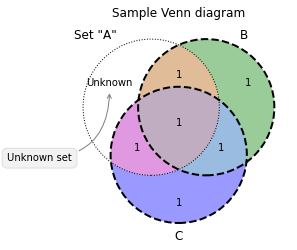

In [39]:

from matplotlib_venn import venn3, venn3_circles
plt.figure(figsize=(4,4))
v = venn3(subsets=(1, 1, 1, 1, 1, 1, 1), set_labels = ('A', 'B', 'C'))
v.get_patch_by_id('100').set_alpha(1.0)
v.get_patch_by_id('100').set_color('white')
v.get_label_by_id('100').set_text('Unknown')
v.get_label_by_id('A').set_text('Set "A"')
c = venn3_circles(subsets=(1, 1, 1, 1, 1, 1, 1), linestyle='dashed')
c[0].set_lw(1.0)
c[0].set_ls('dotted')
plt.title("Sample Venn diagram")
plt.annotate('Unknown set', xy=v.get_label_by_id('100').get_position() - np.array([0, 0.05]), xytext=(-70,-70),
             ha='center', textcoords='offset points', bbox=dict(boxstyle='round,pad=0.5', fc='gray', alpha=0.1),
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0.5',color='gray'))
plt.show()

Resources: <br>
https://pypi.org/project/matplotlib-venn/  <br>
https://recursospython.com/guias-y-manuales/diagramas-de-venn-con-matplotlib/  <br>
https://relopezbriega.github.io/blog/2015/10/11/conjuntos-con-python/ <br>   

### Un poco de analisis de los genes consultado en TAIR y PANTHER DB

In [185]:
file="results-data/gene_ID_response_stress_pantherGeneList.txt"
df_pantherDB_stress= pd.read_csv(file, sep='\t', header=None)

df.df_pantherDB_stress = [1, 2, 3,4,5,6]
df_pantherDB_stress.columns = ['locus', 'gene', 'family','subfamily','e','f']

df_pantherDB_stress

,locus,gene,family,subfamily,e,f
0,ARATH|TAIR=locus=1006230139|UniProtKB=F4IHC3,AT2G05635,DNA repair DEAD helicase RAD3/XP-D subfamily p...,FANCONI ANEMIA GROUP J PROTEIN (PTHR11472:SF47),DNA helicase(PC00011),Arabidopsis thaliana
1,ARATH|TAIR=locus=2081730|UniProtKB=Q9LZJ7,AT3G62680,Proline-rich protein 3;PRP3;ortholog,PROLINE-RICH PROTEIN 1-RELATED (PTHR33470:SF25),NaN,Arabidopsis thaliana
2,ARATH|TAIR=locus=2010207|UniProtKB=F4I1P7,AT1G49250,DNA ligase;At1g49250;ortholog,DNA LIGASE 1 (PTHR45674:SF4),DNA ligase(PC00012),Arabidopsis thaliana
3,ARATH|Gene_OrderedLocusName=At5g59270|UniProtK...,AT5G59270,Putative L-type lectin-domain containing recep...,L-TYPE LECTIN-DOMAIN CONTAINING RECEPTOR KINAS...,NaN,Arabidopsis thaliana
4,ARATH|EnsemblGenome=AT1G07460|UniProtKB=Q9LNW6,AT1G07460,Concanavalin A-like lectin family protein;At1g...,CONCANAVALIN A-LIKE LECTIN FAMILY PROTEIN-RELA...,NaN,Arabidopsis thaliana


In [186]:
pd_stress = df_pantherDB_stress.iloc[:,[1,2]]
pd_stress

,gene,family
0,AT2G05635,DNA repair DEAD helicase RAD3/XP-D subfamily p...
1,AT3G62680,Proline-rich protein 3;PRP3;ortholog
2,AT1G49250,DNA ligase;At1g49250;ortholog
3,AT5G59270,Putative L-type lectin-domain containing recep...
4,AT1G07460,Concanavalin A-like lectin family protein;At1g...


In [187]:
lst_cel_component=['nucleo','cell periphery','nucleus/mitochondrion','transmembrane receptor protein serine/threonine kinase activity','transmembrane receptor protein serine/threonine kinase activity']
lst_biol_process=['Unknow','Unknow','DNA repair','defense response to bacterium','defense response to bacterium']

In [188]:
pd_stress['cell_component'] = lst_cel_component 
pd_stress['bio_process']= lst_biol_process

/home/cyntsc/Proyectos/tesis-code/jn_tesis_env/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/home/cyntsc/Proyectos/tesis-code/jn_tesis_env/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [189]:
pd_stress

,gene,family,cell_component,bio_process
0,AT2G05635,DNA repair DEAD helicase RAD3/XP-D subfamily p...,nucleo,Unknow
1,AT3G62680,Proline-rich protein 3;PRP3;ortholog,cell periphery,Unknow
2,AT1G49250,DNA ligase;At1g49250;ortholog,nucleus/mitochondrion,DNA repair
3,AT5G59270,Putative L-type lectin-domain containing recep...,transmembrane receptor protein serine/threonin...,defense response to bacterium
4,AT1G07460,Concanavalin A-like lectin family protein;At1g...,transmembrane receptor protein serine/threonin...,defense response to bacterium
